In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import sys
sys.path.append('/home/kian/Bureaublad/Repo')

from MTP.FVSimulation_phase_density.Finite_volume_method_1D import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

In [2]:
chippath = '../../DataKian/bTa_LT278W2chip5/'
filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
length = 90

lambdanm = 402
KID402 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 673
KID673 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 986
KID986 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 1545
KID1545 = KID_data(chippath,lambdanm,filename,length)

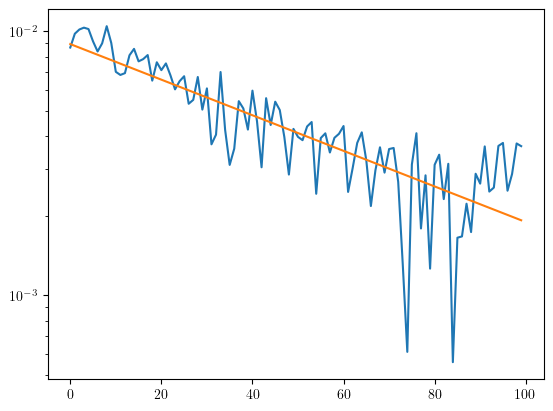

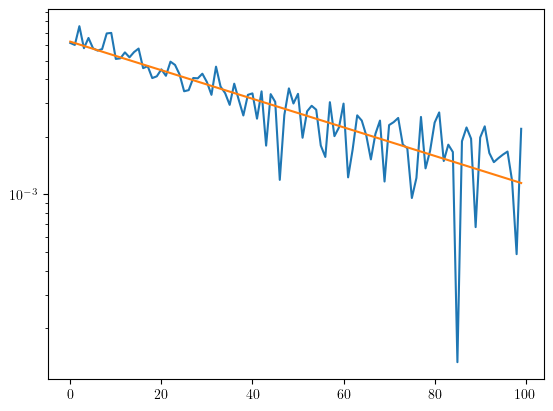

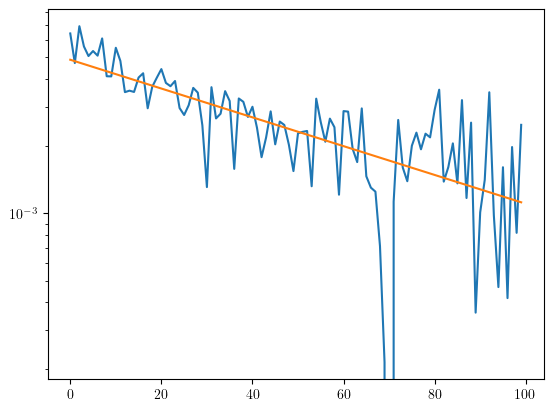

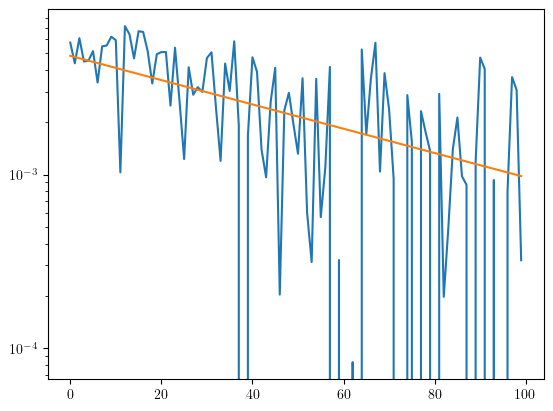

In [3]:
KID402.fit_tail(start=150,end=250)
KID673.fit_tail(start=150,end=250)
KID986.fit_tail(start=150,end=250)
KID1545.fit_tail(start=130,end=230)

In [4]:
print(KID402.tauqpstar,KID402.tauqpstarstd)
print(KID673.tauqpstar,KID673.tauqpstarstd)
print(KID986.tauqpstar,KID986.tauqpstarstd)
print(KID1545.tauqpstar,KID1545.tauqpstarstd)
print(KID402.L)
print(KID673.L)
print(KID986.L)
print(KID1545.L)

L=KID402.L

KIDdict = {
    402 : KID402,
    673 : KID673,
    986 : KID986,
    1545 : KID1545
}

64.47248733519922 4.86899916554073
58.248553397863745 4.300854595584184
67.3438194726096 6.939516763746381
62.03713253438946 11.676947426565471
0.015510492015003163
0.017167808325977668
0.014849172616452574
0.016119378171543686


In [5]:
simtime = 100
leeway = 0

FITx = np.arange(simtime-leeway)*KID402.dt
FITy = {}
for l in [402,673,986,1545]:
    indmin = np.argmax(KIDdict[l].phase)
    indmax = indmin + simtime - leeway
    FITy[l] = KIDdict[l].[indmin:indmax]

plotdatay = np.array([FITy[402],FITy[673],FITy[986],FITy[1545]])
fitdatay = plotdatay.ravel()

def func_to_parallelize(t,D,K,phi_init,l,KID):
     SIM = KID_sim(KID,D,K,phi_init/l,0.05,1/4,L=L,sigma_IC=5,simtime_approx=simtime)
     return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
     
def fitfunc(t,D,K,IC):
     datalist = Parallel(n_jobs=4)(delayed(func_to_parallelize)(t,D,K,IC,l,KIDdict[l]) for l in [402,673,986,1545])
     return np.concatenate(datalist)

100%|██████████| 2000/2000 [00:08<00:00, 233.85it/s]


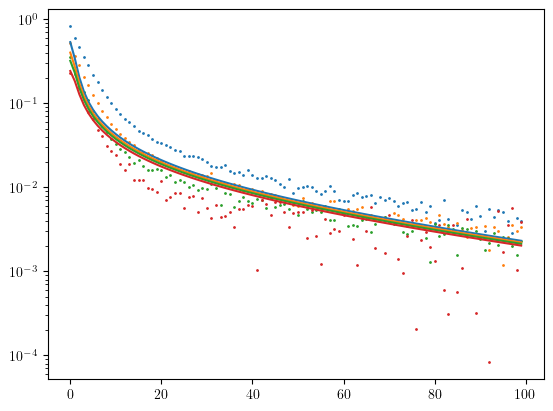

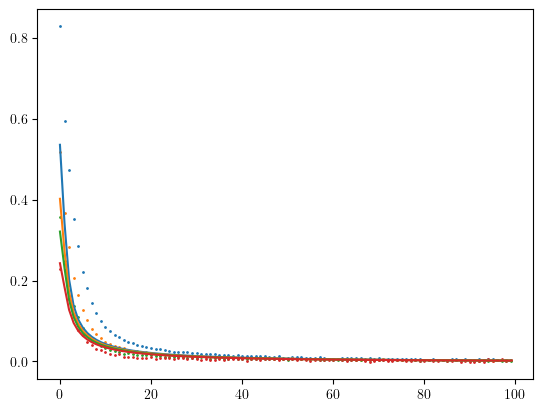

100%|██████████| 2000/2000 [00:08<00:00, 241.10it/s]


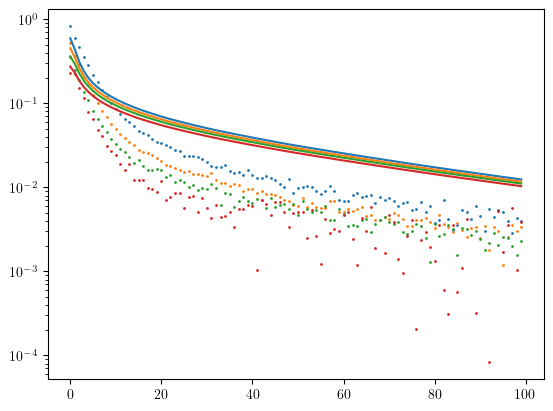

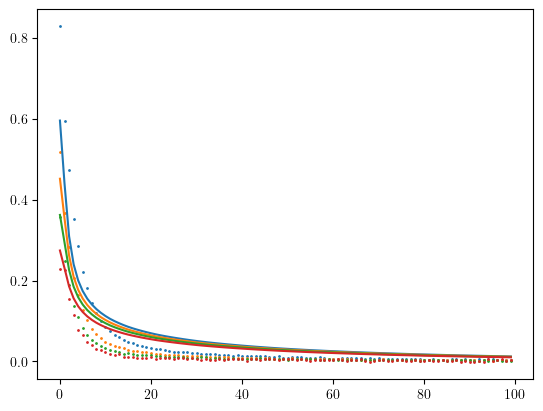

100%|██████████| 2000/2000 [00:12<00:00, 158.48it/s]


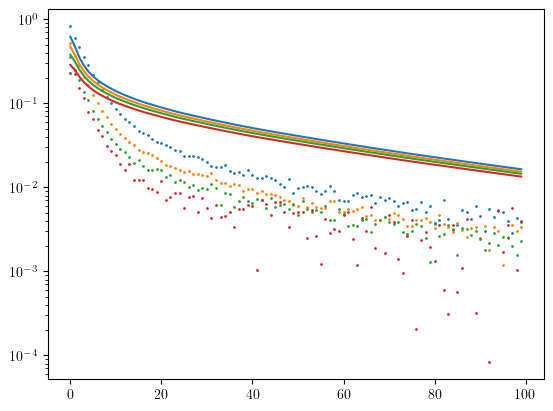

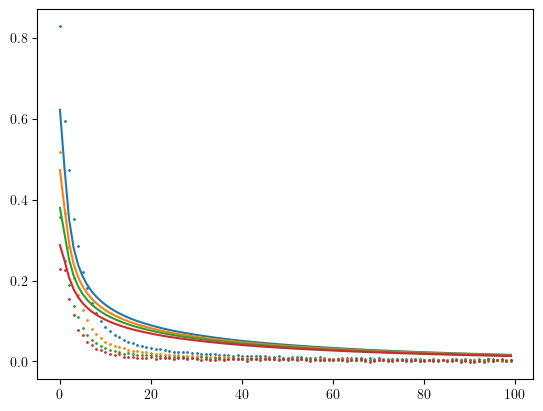

100%|██████████| 2000/2000 [00:12<00:00, 166.14it/s]


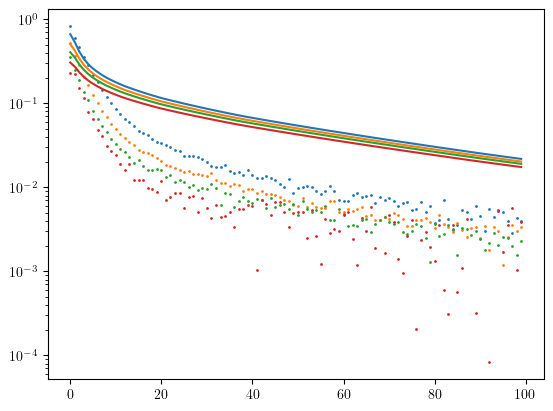

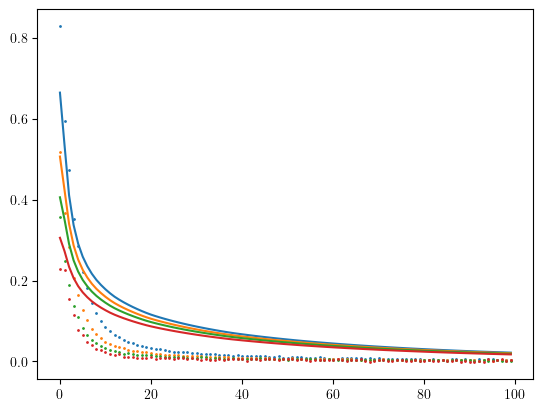

In [6]:
for D in [0,10,20,40]:
    fitted = fitfunc(FITx,D,65,890)
    plotfit = np.reshape(fitted,plotdatay.shape)
    for y,fit in zip(plotdatay,plotfit):
        plt.scatter(FITx,y,s=1)
        plt.semilogy(FITx,fit)
    plt.show()
    for y,fit in zip(plotdatay,plotfit):
        plt.scatter(FITx,y,s=1)
        plt.plot(FITx,fit)
    plt.show()